# Algoritmo de detección de circulos en imágenes

In [1]:
#importación de librerías
import cv2     #Librería OpenCV
from IPython.display import Image   #Libreria impresión de imagenes
import numpy as np                  #Importación numpy
from matplotlib import pyplot as plt  #Impresión de gráficas
from PIL import Image
#Import math Library
import math

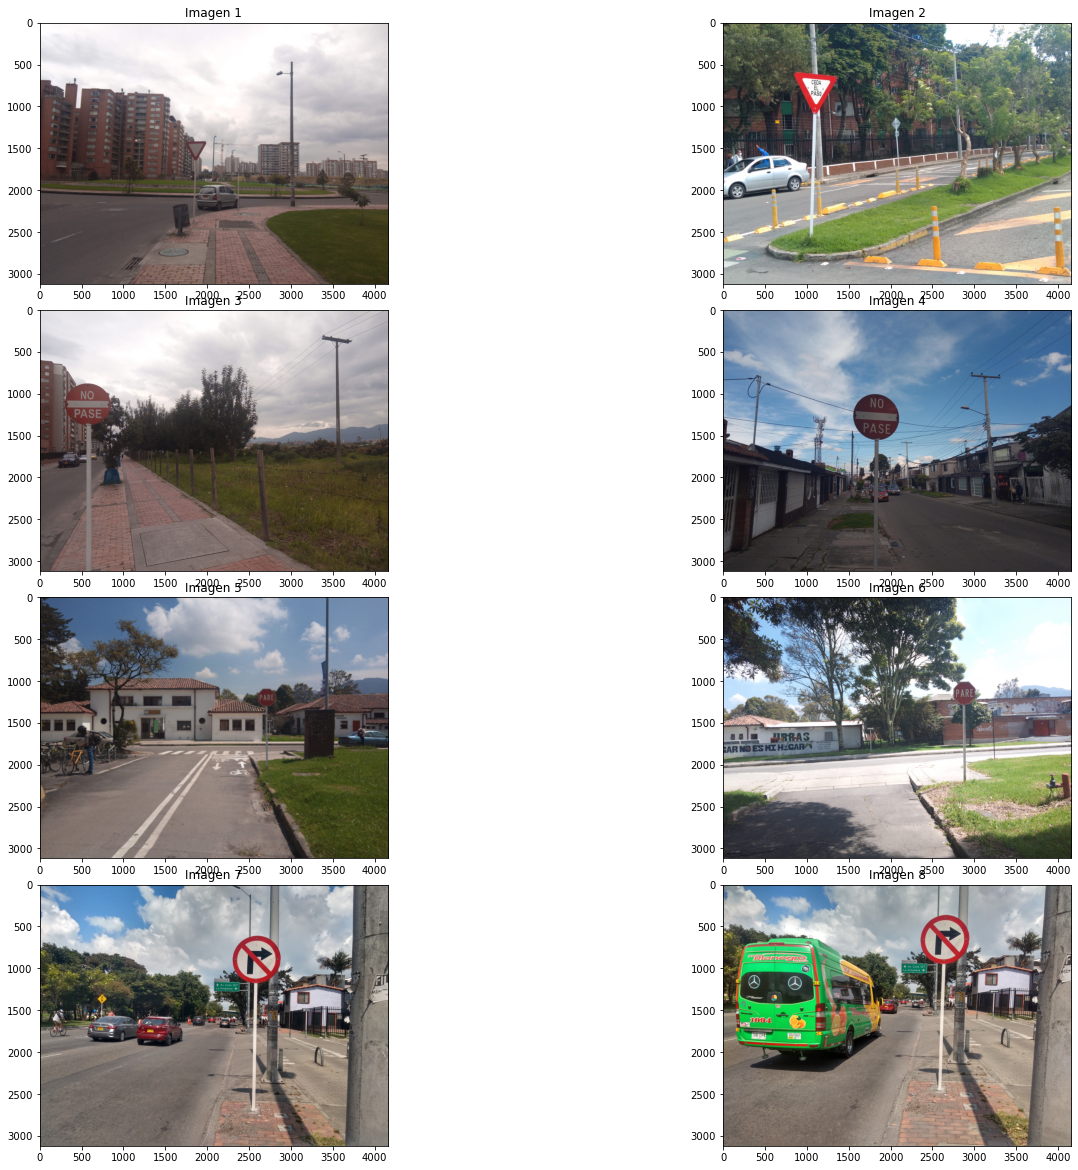

In [1222]:
#lectura de las imágenes
ima1=cv2.imread("img/Cedapaso1.jpg")
ima2=cv2.imread("img/Cedapaso2.jpg")
ima3=cv2.imread("img/Nopase1.jpg")
ima4=cv2.imread("img/Nopase2.jpg")
ima5=cv2.imread("img/Pare1.jpg")
ima6=cv2.imread("img/Pare2.jpg")
ima7=cv2.imread("img/Prohibidogiroder1.jpg")
ima8=cv2.imread("img/Prohibidogiroder2.jpg")
ima9=cv2.imread("img/Pare8.jpg")
ima10=cv2.imread("img/Flechader6.jpg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)
ima7=cv2.cvtColor(ima7,cv2.COLOR_BGR2RGB)
ima8=cv2.cvtColor(ima8,cv2.COLOR_BGR2RGB)
ima9=cv2.cvtColor(ima9,cv2.COLOR_BGR2RGB)
ima10=cv2.cvtColor(ima10,cv2.COLOR_BGR2RGB)
#se imprimen las imágenes para verificar correcto funcionamiento
plt.figure(1);
plt.subplot(4,2,1);plt.imshow(ima1),plt.title('Imagen 1')
plt.subplot(4,2,2);plt.imshow(ima2),plt.title('Imagen 2')
plt.subplot(4,2,3);plt.imshow(ima3),plt.title('Imagen 3')
plt.subplot(4,2,4);plt.imshow(ima4),plt.title('Imagen 4')
plt.subplot(4,2,5);plt.imshow(ima5),plt.title('Imagen 5')
plt.subplot(4,2,6);plt.imshow(ima6),plt.title('Imagen 6')
plt.subplot(4,2,7);plt.imshow(ima7),plt.title('Imagen 7')
plt.subplot(4,2,8);plt.imshow(ima8),plt.title('Imagen 8')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

# Ubralisación Adaptativa

In [1223]:
def umb_adaptativa(imagen,sz,c):
    ima=cv2.cvtColor(imagen.copy(),cv2.COLOR_RGB2YCrCb)
    Y,Cr,Cb=cv2.split(ima)

    #Umbralisación canal Cr
    thCr = cv2.adaptiveThreshold(Cr,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,sz,c)
    imaCr= cv2.bitwise_and(Cr,thCr)
    return thCr

In [1224]:
def umbral_hsv_rojo(imagen):
    redBajo1 = np.array([0,85,10],np.uint8) 
    redAlto1 = np.array([8,255,255],np.uint8)
    redBajo2 = np.array([165,85,10],np.uint8) 
    redAlto2 = np.array([180,255,255],np.uint8) 
    img_hsv = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    maskRed1 = cv2.inRange(img_hsv, redBajo1, redAlto1)
    maskRed2 = cv2.inRange(img_hsv, redBajo2, redAlto2)
    maskRed = cv2.add(maskRed1,maskRed2)
    #res= cv2.bitwise_and(imagen,imagen,maskRed=maskRed)
    plt.figure();
    plt.imshow(imagen),plt.xticks([]), plt.yticks([])
    plt.figure();
    plt.subplot(1,2,1);plt.imshow(maskRed, cmap='gray'),plt.title('1'),plt.xticks([]), plt.yticks([])
    #plt.subplot(1,2,2);plt.imshow(res),plt.title('2'),plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
    return maskRed

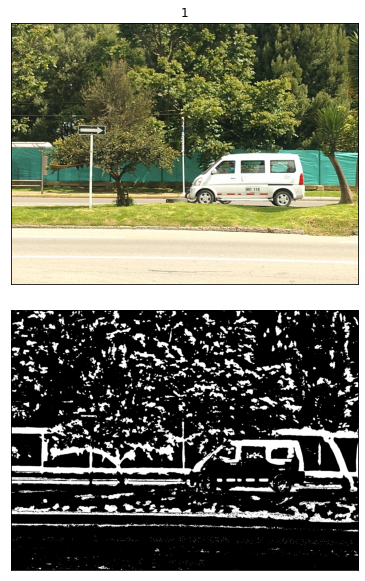

In [1225]:
ima=ima10.copy()
ima_umb=umb_adaptativa(ima,201,-2)
plt.figure();
plt.subplot(2,1,1);plt.imshow(ima, cmap='gray'),plt.title('1'),plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2);plt.imshow(ima_umb,cmap="gray"),plt.xticks([]), plt.yticks([])
plt.subplots_adjust(top=2, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

## Llenado de Señales

In [1226]:
def encontrar_semilla(imagen):
    semilla=None
    h,w=imagen.shape
    h=h-1
    w=w-1
    if imagen[0,0]==0:
        semilla=(0,0)
    elif imagen[h,0]==0:
        semilla=(h,0)
    elif imagen[h,w]==0:
        semilla=(h,w)
    elif imagen[0,w]==0:
        semilla=(0,w)
    else:
        print("no pudo encontrar una buena semilla")
    return semilla

In [1227]:
def llenado(imagen):
    
    im_floodfill = imagen.copy()
    h, w = imagen.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    seed=encontrar_semilla(imagen)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, seed, 255);

     # Invert floodfilled image

    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.

    im_out = imagen | im_floodfill_inv
    return im_out

(<matplotlib.image.AxesImage at 0x1f9ac6eb970>, ([], []), ([], []))

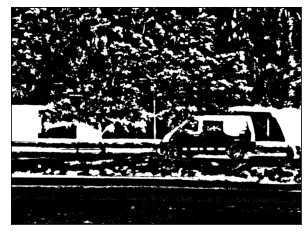

In [1228]:
ima_llenado=llenado(ima_umb)
plt.imshow(ima_llenado, cmap="gray"),plt.xticks([]), plt.yticks([])

# Operaciones morfológicas

In [1229]:
def erosion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.erode(ima,kernel)
    return ima

In [1230]:
def dilatacion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.dilate(ima,kernel,n)
    return ima

In [1231]:
def apertura(imagen,a,b,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima= cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)
    return ima

(<matplotlib.image.AxesImage at 0x1f9ac8e6370>, ([], []), ([], []))

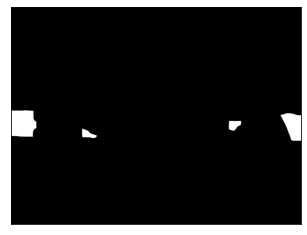

In [1232]:
ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
plt.imshow(ima_erosion,cmap="gray"),plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x1f9ac356340>, ([], []), ([], []))

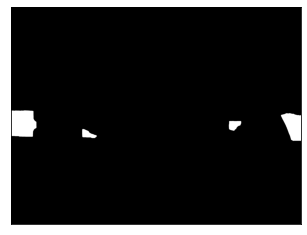

In [1233]:
ima_apertura=apertura(ima_erosion,22,22,"elipse")
plt.imshow(ima_apertura,cmap="gray"),plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x1f9963dedf0>, ([], []), ([], []))

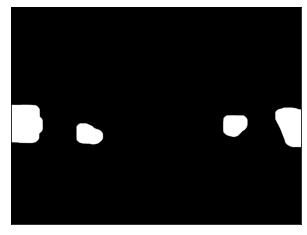

In [1234]:
ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
plt.imshow(ima_dilatacion,cmap="gray"),plt.xticks([]), plt.yticks([])

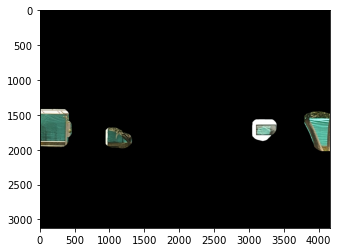

In [1235]:
ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
plt.imshow(ima_final)

# Segmentación

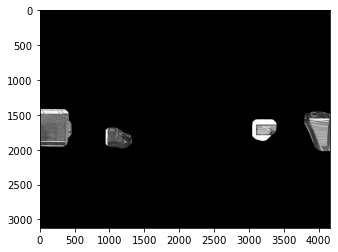

In [1236]:
ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
plt.imshow(ima_bw,cmap="gray")

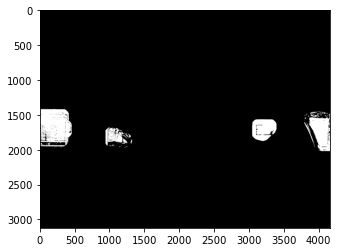

In [1237]:
ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap="gray")

In [1238]:
def extraccion_ROI(imagen):
    imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    ima=imagen
    ima_umb=umbral_hsv_rojo(ima)
    ima_llenado=llenado(ima_umb)
    ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
    ima_apertura=apertura(ima_erosion,10,10,"elipse")
    ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
    ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
    ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure()
    plt.subplot(4,2,1),plt.imshow(ima)
    plt.subplot(4,2,2),plt.imshow(ima_umb)
    plt.subplot(4,2,3),plt.imshow(ima_llenado)
    plt.subplot(4,2,4),plt.imshow(ima_erosion)
    plt.subplot(4,2,5),plt.imshow(ima_apertura)
    plt.subplot(4,2,6),plt.imshow(ima_dilatacion)
    plt.subplot(4,2,7),plt.imshow(ima_final)
    plt.subplot(4,2,8),plt.imshow(ima_bw)
    plt.subplot(5,2,9),plt.imshow(th1)
    return th1

## Momentos de Hu

In [1239]:
moments = cv2.moments(th1)
huMoments = cv2.HuMoments(moments)

In [1240]:
huMoments

array([[2.50466389e-02],
       [6.12248257e-04],
       [7.04348227e-07],
       [6.84034179e-07],
       [4.74799539e-13],
       [1.69135952e-08],
       [3.65691895e-16]])

In [1241]:
# Log scale hu moments
for i in range(7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * np.log(np.abs(huMoments[i]))


In [1242]:
huMoments

array([[ 3.68701564],
       [ 7.39837271],
       [14.16599296],
       [14.19525795],
       [28.3758837 ],
       [17.89514809],
       [35.54474051]])

## Detección de Blobs en las imágenes

### Detección de contornos

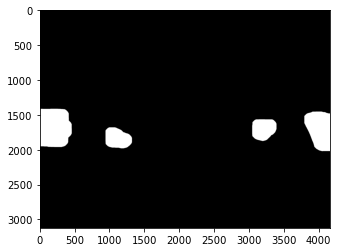

In [1243]:
plt.imshow(ima_dilatacion,cmap="gray")

area del contorno0= 91831.5
area del contorno1= 90935.5
area del contorno2= 1631.0
area del contorno3= 1696.0


(<matplotlib.image.AxesImage at 0x1f995f92940>, ([], []), ([], []))

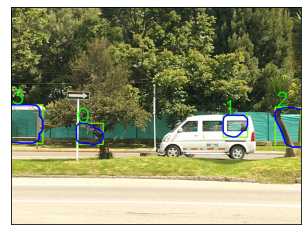

In [1244]:
ima_contornos=ima.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
edges = cv2.morphologyEx(ima_dilatacion, cv2.MORPH_GRADIENT, kernel)
contours, hierarchy = cv2.findContours(edges , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    area=str(cv2.contourArea(contours[i]))
    cv2.rectangle(ima_contornos,(x,y),(x+w,y+h),(120,255,0),15)
    cv2.drawContours (ima_contornos, contours, i, (0, 0, 255), 20)
    cv2.putText(ima_contornos,str(i),(x,y-10),2,10,(0,255,0),10)
    print("area del contorno"+str(i)+"= "+area)
    
plt.imshow(ima_contornos),plt.xticks([]), plt.yticks([])

### Extracción de características a partir de los contornos

In [1245]:
for i in range(len(contours)):
    #Area del contorno
    area=cv2.contourArea(contours[i])
    #Longitud del contorno
    long=cv2.arcLength(contours[i],True)
    #Posición del centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")

area del contorno 0= 91831.5
Perímetro del contorno 0= 1179.1341195106506
Posición del Centroide 0= (1112,1837 )
Redondez del contorno 0= 0.8299943377743362
Compacidad del contorno 0= 15.140308846029493

area del contorno 1= 90935.5
Perímetro del contorno 1= 1144.9919879436493
Posición del Centroide 1= (3207,1703 )
Redondez del contorno 1= 0.8716425602128298
Compacidad del contorno 1= 14.416885071893264

area del contorno 2= 1631.0
Perímetro del contorno 2= 2313.6996977329254
Posición del Centroide 2= (3925,1710 )
Redondez del contorno 2= 0.0038286868386465606
Compacidad del contorno 2= 3282.1620424827897

area del contorno 3= 1696.0
Perímetro del contorno 3= 2689.910812497139
Posición del Centroide 3= (308,1690 )
Redondez del contorno 3= 0.0029455062640313867
Compacidad del contorno 3= 4266.285483012392



 ### Extracción de Características usando aproximación de contorno

alpha usado= 0.001

area del contorno 0= 91752.5
Perímetro del contorno 0= 1142.873278617859
Posición del Centroide 0= (1112,1837 )
Redondez del contorno 0= 0.8827375745423222
Compacidad del contorno 0= 14.235681109274779

area del contorno 1= 90912.5
Perímetro del contorno 1= 1114.440179347992
Posición del Centroide 1= (3207,1703 )
Redondez del contorno 1= 0.919856203607553
Compacidad del contorno 1= 13.661233750531384

area del contorno 2= 1614.5
Perímetro del contorno 2= 2210.4255409240723
Posición del Centroide 2= (3923,1713 )
Redondez del contorno 2= 0.004152370845903601
Compacidad del contorno 2= 3026.3122155277038

area del contorno 3= 1605.0
Perímetro del contorno 3= 2638.1106243133545
Posición del Centroide 3= (326,1687 )
Redondez del contorno 3= 0.002898003428293345
Compacidad del contorno 3= 4336.216614401867



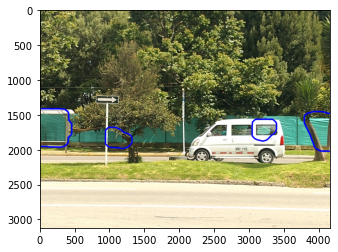

In [1246]:
alpha=0.001
ima_aproximacion=ima.copy()
print("alpha usado= "+str(alpha))
print("")
for i in range(len(contours)):
    cnt=contours[i]
    epsilon = alpha*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    #Area del contorno
    area=cv2.contourArea(approx)
    #Longitud del contorno
    long=cv2.arcLength(approx,True)
    #Posición del centroide
    M = cv2.moments(approx)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    #compacidad
    comp=long**2/area
    #redondez
    redon=4*np.pi*area/long**2
    #dibujar contornos
    cv2.drawContours (ima_aproximacion, [approx], 0, (0, 0, 255), 20)
    
    print("area del contorno "+str(i)+"= "+str(area))
    print("Perímetro del contorno "+str(i)+"= "+str(long))
    print("Posición del Centroide "+str(i)+"= ("+str(cx)+","+str(cy),")")
    print("Redondez del contorno "+str(i)+"= "+str(redon))
    print("Compacidad del contorno "+str(i)+"= "+str(comp))
    print("")
    plt.imshow(ima_aproximacion)

### Mínimo rectangulo

Longitud lado largo 0= 381.0
Longitud Lado corto 0= 302.0
Relación entre lados 0= 1.2615894039735098

Longitud lado largo 1= 350.0
Longitud Lado corto 1= 313.0
Relación entre lados 1= 1.1182108626198084

Longitud lado largo 2= 569.0
Longitud Lado corto 2= 368.0
Relación entre lados 2= 1.546195652173913

Longitud lado largo 3= 550.0
Longitud Lado corto 3= 456.0
Relación entre lados 3= 1.206140350877193



(<matplotlib.image.AxesImage at 0x1f98d26af10>, ([], []), ([], []))

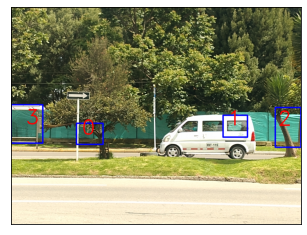

In [1247]:
ima_min_rect=ima.copy()
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    #posición Centroide
    M = cv2.moments(contours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    #Longitudes rectangulo
    a=cv2.arcLength(np.array([box[0],box[1]]),False)
    b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
    largo=np.max([a,b])
    corto=np.min([a,b])
    rel=largo/corto
    
    cv2.drawContours(ima_min_rect,[box],0,(0,0,255),20)
    cv2.putText(ima_min_rect,str(i),(cx-100,cy),2,10,(255,0,0),10)
    print("Longitud lado largo "+str(i)+"= "+str(largo))
    print("Longitud Lado corto "+str(i)+"= "+str(corto))
    print("Relación entre lados "+str(i)+"= "+str(rel))
    print("")
plt.imshow(ima_min_rect),plt.xticks([]), plt.yticks([])

In [1248]:
def getCharacteristics(contornos):
    caracteristicas=[]
    for i in range(len(contornos)):
        cont=contours[i]
        #Area del contorno
        area=cv2.contourArea(cont)
        #Longitud del contorno
        long=cv2.arcLength(cont,True)
        #Posición del centroide
        M = cv2.moments(cont)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cent=(cx,cy)
        #compacidad
        comp=long**2/area
        #redondez
        redon=4*np.pi*area/long**2
        #mínimo rectangulo
        rect = cv2.minAreaRect(cont)
        box = cv2.boxPoints(rect)
    
        #Longitudes rectangulo
        a=cv2.arcLength(np.array([box[0],box[1]]),False)
        b=cv2.arcLength(np.array([box[0],box[3]]),False)
    
        largo=np.max([a,b])
        corto=np.min([a,b])
        rel=largo/corto
        
        #rectangulo limite
        x,y,w,h=cv2.boundingRect(contours[i])
        rect_lim={"x":x,
                 "y":y,
                 "w":w,
                 "h":h}
        
        diccionario={"Area":area,
                    "Perimetro":long,
                    "Centroide":cent,
                    "Compacidad":comp,
                    "Redondez":redon,
                    "Minimo Rectangulo":box,
                    "Lado largo":largo,
                    "Lado corto":corto,
                    "Relacion entre lados":rel,
                    "Rectangulo limite":rect_lim}
        caracteristicas.append(diccionario)
    return caracteristicas 
        

### Método de Otsu

In [1249]:
def umbral_otsu(hist):
    Q=np.zeros(256)
    a=np.zeros(256)
    b=np.zeros(256)
    w0=np.zeros(256)
    w1=np.zeros(256)
    u0=np.zeros(256)
    u1=np.zeros(256)
    a[0]=hist[0]
    b[0]=hist[0]
    for i in range(255):
        #histograma incremental
        a[i+1]=a[i]+hist[i+1]
        #histograma i*h incremental
        b[i+1]=b[i]+(i+2)*hist[i+1]
    for i in range(255):
        w0[i]=a[i]
        w1[i]=a[255]-a[i]
        if w0[i]!=0:
            u0[i]=b[i]/w0[i]
        if w1[i]!=0:
            u1[i]=(b[255]-b[i])/w1[i]
    Q=w0*w1*(u0-u1)**2
    r=np.argmax(Q)
    return r

In [1263]:
caracteristicas=getCharacteristics(contours)
imagenes=[]
mascaras=[]
hist=[]
th=[]
for i in range(len(contours)):
    #obtiene la relación de lados
    rel=caracteristicas[i].get("Relacion entre lados")
    if rel<1.5 :
        rect_lim=caracteristicas[i].get("Rectangulo limite")
        x_ini=rect_lim.get("x")
        x_fin=rect_lim.get("x")+rect_lim.get("w")
        y_ini=rect_lim.get("y")
        y_fin=rect_lim.get("y")+rect_lim.get("h")
        
        #imagen_cortada=np.zeros([y_fin-y_ini,x_fin-x_ini,1])
        
        imagen_cortada=ima_final[y_ini:y_fin,x_ini:x_fin,:]
        mascara_cortada=ima_dilatacion[y_ini:y_fin,x_ini:x_fin]
        
        
        mask = np.zeros(imagen_cortada.shape[:2], dtype="uint8")
        cv2.rectangle(mask, (1, 2), (3, 5), 255, -1)
        
        ima_gris=cv2.cvtColor(imagen_cortada,cv2.COLOR_RGB2GRAY)
        
        histo = cv2.calcHist([ima_gris], [0], mascara_cortada, [256], [0, 255]) 
        histo = histo/np.sum(histo)
        r=umbral_otsu(histo)
        ret,th1 = cv2.threshold(ima_gris.copy(),r,255,cv2.THRESH_BINARY)
        print(x_ini)
        print(x_fin)
        print(y_ini)
        print(x_fin)
        print(r)
        print("")
        imagenes.append(ima_gris)
        mascaras.append(mascara_cortada)
        hist.append(histo)
        th.append(th1)

939
1321
1678
1321
142

3043
3394
1563
3394
192

0
457
1412
457
166



256


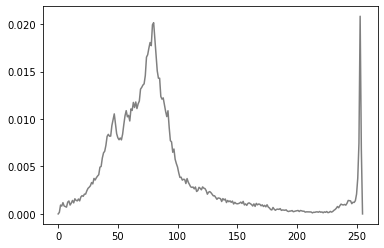

In [1264]:
plt.plot(hist[0], color='gray')
print(hist[0].size)

(<matplotlib.image.AxesImage at 0x1f98cb4ad30>, ([], []), ([], []))

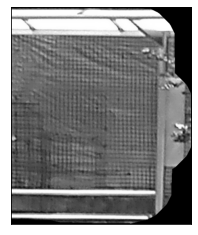

In [1265]:
plt.imshow(imagenes[2],cmap="gray"),plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x1f98cb7ea00>, ([], []), ([], []))

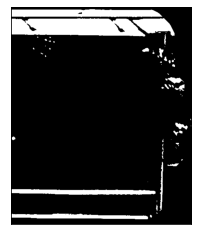

In [1266]:
plt.imshow(th[2],cmap="gray"),plt.xticks([]), plt.yticks([])

In [1267]:
def entropia(hist):
    H=np.sum(np.where(hist>0,hist*np.log2(hist),0))
    return H

In [1268]:
for i in range(len(imagenes)):
    moments = cv2.moments(th[i])
    huMoments = cv2.HuMoments(moments)
    huMoments = -1* np.sign(huMoments) * np.log10(np.abs(huMoments))
    area_rellena=np.sum(th[i]!=0)
    #area_total=caracteristicas[i].get("Area")
    area_total=np.sum(mascaras[i]!=0)
    porcentaje_area_rellena=area_rellena*100/area_total
    diccionario={"Momentos de Hu":huMoments,
                "Entropia":entropia(hist[i]),
                "Porcentaje de Area Rellena":porcentaje_area_rellena}
    caracteristicas[i].update(diccionario)

C:\Users\j2seb\AppData\Local\Temp/ipykernel_19140/2719572369.py:2: RuntimeWarning: divide by zero encountered in log2
  H=np.sum(np.where(hist>0,hist*np.log2(hist),0))
C:\Users\j2seb\AppData\Local\Temp/ipykernel_19140/2719572369.py:2: RuntimeWarning: invalid value encountered in multiply
  H=np.sum(np.where(hist>0,hist*np.log2(hist),0))


In [1269]:
caracteristicas[2]

{'Area': 1631.0,
 'Perimetro': 2313.6996977329254,
 'Centroide': (3925, 1710),
 'Compacidad': 3282.1620424827897,
 'Redondez': 0.0038286868386465606,
 'Minimo Rectangulo': array([[3791., 2021.],
        [3791., 1452.],
        [4159., 1452.],
        [4159., 2021.]], dtype=float32),
 'Lado largo': 569.0,
 'Lado corto': 368.0,
 'Relacion entre lados': 1.546195652173913,
 'Rectangulo limite': {'x': 3791, 'y': 1452, 'w': 369, 'h': 570},
 'Momentos de Hu': array([[ 2.19126712],
        [ 5.05749332],
        [ 6.96325189],
        [ 6.94139828],
        [13.8949305 ],
        [ 9.47349952],
        [15.02182611]]),
 'Entropia': -7.0381317,
 'Porcentaje de Area Rellena': 14.120938881482001}

In [1270]:
def histograma(imagen, mask=None, normalize=False):
    hist=np.zeros(256)
    h,w=imagen.shape[:2]
    for i in range(h):
        for j in range(w):
            if (mask.all()==None or mask[i,j]):
                k=imagen[i,j]
                hist[k]+=1
    if normalize:
        a=np.sum(hist)
        hist=hist/a
    return hist

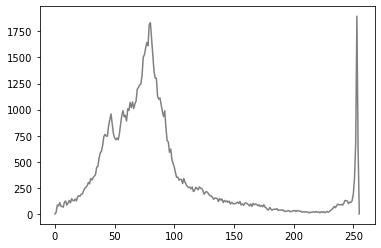

In [1271]:
h=histograma(imagenes[0],mask=mascaras[0],normalize=False)
plt.plot(h, color='gray')

In [1272]:
r

166

In [1273]:
a=[1,2,3]
b=[4,5,6]
a.append(b)

In [1274]:
a+b

[1, 2, 3, [4, 5, 6], 4, 5, 6]

In [1275]:
r

166